In [1]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
import matplotlib.pyplot as plt

**트레이닝 데이터**

In [2]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4,
                    25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12,1])

train_x = np.zeros([12, 5])
for row, month in enumerate(range(1, 13)):
    for col, n in enumerate(range(0, 5)):
        train_x[row][col] = month**n

In [3]:
train_x

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04],
       [1.0000e+00, 1.1000e+01, 1.2100e+02, 1.3310e+03, 1.4641e+04],
       [1.0000e+00, 1.2000e+01, 1.4400e+02, 1.7280e+03, 2.0736e+04]])

**변수에 해당하는 값들을 placeholder로 정의한다.** <br>
텐서플로에서 트레이닝 세트 데이터를 저장하는 변수를 placeholder라고 한다. 

In [4]:
x = tf.placeholder(tf.float32, [None, 5])

tf.placeholder(tf.float32, [None, 5])<br>
[None,5]는 행렬의 크기를 지정하는 인수다. <br>
12X5 행렬이지만, 12는 데이터의 갯수에 해당하고 실제 크기는 5이므로 [None,5]로 표현한다. <br>
이렇게하여 텐서플로에서 임의의 데이터 갯수를 받아들일 수 있도록 해준다. 

**실제기온 t 정의**<br>
실제기온temperature를 저장할 t를 placeholder로 저장한다. <br>

In [5]:
t = tf.placeholder(tf.float32, [None,1])

**Variable을 정의한다.**<br>
Tensorflow가 최적화할 파라미터를 Variable이라고 한다. 

In [6]:
w = tf.Variable(tf.zeros([5,1]))

[5,1]은 5X1 행렬을 뜻한다. 

**계산식을 정의한다.**

In [7]:
y = tf.matmul(x,w)

tf.matmul은 행렬을 곱하는 함수로써, Placeholder x, Variable w를 행렬곱 한다. <br>
x에는 아직 값이 입력되지 않았고, y도 구체적으로 정해지지 않았다는 점을 주의해야 한다. 

**Loss function**을 정의한다. 

In [8]:
loss = tf.reduce_sum(tf.square(y-t))

loss function의 앞에 1/2이 없다. loss를 최소화 하는 것이 목적이므로 1/2을 빼도 결과는 똑같기 때문이다. 

머신러닝의 3단계중 1,2가 마무리 되었다. <br>
1단계. 주어진 데이터를 기반으로 미지의 데이터를 예측하는 식을 생각한다. (여기서는 1차원 함수)<br>
2단계. 파라미터를 평가할 수 있는 오차 함수를 준비한다. <br>
3단계. 오차함수를 최소화 할 수 있도록 파라미터를 결정한다. <br>

**3단계**<br>
오차함수 E를 최소로 만드는 파라미터 결정 단계<br>

최적화에 사용할 경사하강법 트레이닝 알고리즘을 선택한다. 

In [9]:
train_step = tf.train.AdamOptimizer().minimize(loss)

**AdamOptimizer**<br>
tf.train.AdamOptimizer는 텐서플로가 제공하는 트레이닝 알고리즘 중 하나다. <br>
학습률 e를 자동으로 조절하는 구조를 갖추고 있다. <br>
성능이 좋고, 수동으로 학습률을 조정할 필요가 없어 딥러닝에서 자주 이용되는 알고리즘중 하나다. <br>
**minimize**<br>
앞에 정의한 loss(오차함수)를 최소화하도록 명령을 내린다. 

**세션을 이용한 트레이닝 실행**<br>
**세션**: 텐서플로의 실행환경 <br>
세션 안에서 Variable에 해당하는 값을 계산해 간다. <br>

In [10]:
sess = tf.Session()
#sess.run(tf.initialize_all_variables()) #warning
sess.run(tf.global_variables_initializer())

실행한 터미널에서 해당 세션 내의 Variable 값이 초기화 된다. 

**파라미터 최적화**<br>
보정을 10만회. 1만회 실행후 오차 함수값 출력<br>

In [11]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i%10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f' % (i, loss_val))

Step: 10000, Loss: 31.012833
Step: 20000, Loss: 29.292377
Step: 30000, Loss: 28.031116
Step: 40000, Loss: 27.911423
Step: 50000, Loss: 25.769745
Step: 60000, Loss: 24.764515
Step: 70000, Loss: 23.839672
Step: 80000, Loss: 22.970881
Step: 90000, Loss: 22.467999
Step: 100000, Loss: 21.445120


보정 작업을 반복하면 오차 함수가 감소하고 있다. <br>
시험삼아 한번 더 반복해본다

In [12]:
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f' % (i, loss_val))

Step: 110000, Loss: 21.571764
Step: 120000, Loss: 22.586803
Step: 130000, Loss: 19.621506
Step: 140000, Loss: 18.982832
Step: 150000, Loss: 18.482285
Step: 160000, Loss: 18.028996
Step: 170000, Loss: 25.478247
Step: 180000, Loss: 17.177750
Step: 190000, Loss: 16.806355
Step: 200000, Loss: 16.513100


트레이닝 후 파라미터 값을 확인한다.

In [13]:
w_val = sess.run(w)
print (w_val)

[[ 6.106304 ]
 [-4.04215  ]
 [ 2.5105417]
 [-0.2817   ]
 [ 0.0083413]]


트레이닝 후 파라미터를 이용해 예측기온을 계산하는 함수를 정의한다.

In [14]:
def predict(x):
    result = 0.0
    for n in range(0, 5):
        result += w_val[n][0] * x**n
    return result

그래프로 그린다. 

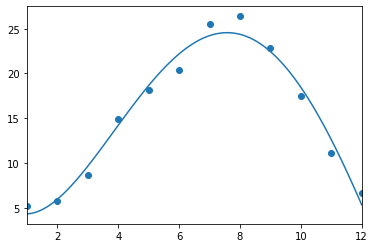

In [15]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex, liney)